## Mini Project 2 - Consumer Complaint Resolution Analysis Using Python

Import required libraries

In [3]:
import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
sns.set_theme(style="whitegrid")
warnings.filterwarnings("ignore")

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yangt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yangt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import wordnet

try:
    wordnet.ensure_loaded()
    print("WordNet is found!")
except Exception as e:
    print("WordNet is Not Found. Please check your NLTK data path")

WordNet is found!


Load given datasets

In [7]:
# On remote private google drive
consumer_complaints_train_df = pd.read_csv('datasets/Consumer_Complaints_train.csv')
consumer_complaints_test_df = pd.read_csv('datasets/Consumer_Complaints_test.csv')

Print top 5 records of train dataset

In [9]:
consumer_complaints_train_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


Print top 5 records of test dataset

In [11]:
consumer_complaints_test_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


**Note: Please note that do all given tasks for test and train both datasets.**

Print shape of train and test datasets

In [14]:
# print the shape of train datasets
consumer_complaints_train_df.shape

(358810, 18)

In [15]:
# print the shape of test datasets
consumer_complaints_test_df.shape

(119606, 17)

Print columns of train and test datasets

In [17]:
# print columns of train datasets
list(consumer_complaints_train_df.columns)

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID']

In [18]:
# print columns of test datasets
list(consumer_complaints_test_df.columns)

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Complaint ID']

Check data type for both datasets

In [20]:
# check the data type of training dataset
consumer_complaints_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84923 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46356 non-null   object
 5   Consumer complaint narrative  18914 non-null   object
 6   Company public response       22460 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118670 non-null  object
 9   ZIP code                      118669 non-null  object
 10  Tags                          16977 non-null   object
 11  Consumer consent provided?    33907 non-null   object
 12  Submitted via                 119606 non-null  object
 13 

In [21]:
# check the data type of testing dataset
consumer_complaints_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84923 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46356 non-null   object
 5   Consumer complaint narrative  18914 non-null   object
 6   Company public response       22460 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118670 non-null  object
 9   ZIP code                      118669 non-null  object
 10  Tags                          16977 non-null   object
 11  Consumer consent provided?    33907 non-null   object
 12  Submitted via                 119606 non-null  object
 13 

Print missing values in percentage

In [23]:
# printing missing values in percentage from training dataset
consumer_train_null_df = pd.DataFrame({'Counts': consumer_complaints_train_df.isnull().sum(),
                                      'Percentage': consumer_complaints_train_df.isnull().sum()/len(consumer_complaints_train_df)})
consumer_train_null_df

,Counts,Percentage
Date received,0,0.000000
Product,0,0.000000
Sub-product,103786,0.289251
Issue,0,0.000000
Sub-issue,219374,0.611393
Consumer complaint narrative,302630,0.843427
Company public response,290879,0.810677
Company,0,0.000000
State,2903,0.008091
ZIP code,2911,0.008113


In [24]:
# printing missing values in percentage from testing dataset
consumer_test_null_df = pd.DataFrame({'Counts': consumer_complaints_test_df.isnull().sum(),
                                      'Percentage': consumer_complaints_test_df.isnull().sum()/len(consumer_complaints_test_df)})
consumer_test_null_df

,Counts,Percentage
Date received,0,0.000000
Product,0,0.000000
Sub-product,34683,0.289977
Issue,0,0.000000
Sub-issue,73250,0.612427
Consumer complaint narrative,100692,0.841864
Company public response,97146,0.812217
Company,0,0.000000
State,936,0.007826
ZIP code,937,0.007834


Drop columns where more than 25% of the data are missing.

In [26]:
# Drop columns where more than 25% of the data are missing in training set
cols_to_drop_in_train = list(consumer_train_null_df.loc[consumer_train_null_df.Percentage > 0.25].index)
consumer_complaints_train_df.drop(columns=cols_to_drop_in_train, axis=1, inplace=True)

# check columns of training set again after dropping columns
pd.DataFrame({'Counts': consumer_complaints_train_df.isnull().sum(),
              'Percentage': consumer_complaints_train_df.isnull().sum()/len(consumer_complaints_train_df)})

,Counts,Percentage
Date received,0,0.000000
Product,0,0.000000
Issue,0,0.000000
Company,0,0.000000
State,2903,0.008091
ZIP code,2911,0.008113
Submitted via,0,0.000000
Date sent to company,0,0.000000
Company response to consumer,0,0.000000
Timely response?,0,0.000000


In [27]:
# Drop columns where more than 25% of the data are missing in testing set
cols_to_drop_in_test = list(consumer_test_null_df.loc[consumer_test_null_df.Percentage > 0.25].index)
consumer_complaints_test_df.drop(columns=cols_to_drop_in_test, axis=1, inplace=True)

# check columns of training set again after dropping columns
pd.DataFrame({'Counts': consumer_complaints_test_df.isnull().sum(),
              'Percentage': consumer_complaints_test_df.isnull().sum()/len(consumer_complaints_test_df)})

,Counts,Percentage
Date received,0,0.000000
Product,0,0.000000
Issue,0,0.000000
Company,0,0.000000
State,936,0.007826
ZIP code,937,0.007834
Submitted via,0,0.000000
Date sent to company,0,0.000000
Company response to consumer,0,0.000000
Timely response?,0,0.000000


Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [29]:
# Extract Date, Month, and Year from the "Date Received" Column in traing set, *.dt is not applicable over here cause the
# target column doesn't belong to datetime type
consumer_complaints_train_df['Day_received'] = pd.DatetimeIndex(consumer_complaints_train_df['Date received']).day
consumer_complaints_train_df['Month_received'] = pd.DatetimeIndex(consumer_complaints_train_df['Date received']).month
consumer_complaints_train_df['Year_received'] = pd.DatetimeIndex(consumer_complaints_train_df['Date received']).year
consumer_complaints_train_df[['Year_received', 'Month_received', 'Day_received']].head()

,Year_received,Month_received,Day_received
0,2015,10,14
1,2015,4,26
2,2013,12,20
3,2016,3,3
4,2015,1,30


In [30]:
# Extract Date, Month, and Year from the "Date Received" Column in testing set, *.dt is not applicable over here cause the
# target column doesn't belong to datetime type
consumer_complaints_test_df['Day_received'] = pd.DatetimeIndex(consumer_complaints_test_df['Date received']).day
consumer_complaints_test_df['Month_received'] = pd.DatetimeIndex(consumer_complaints_test_df['Date received']).month
consumer_complaints_test_df['Year_received'] = pd.DatetimeIndex(consumer_complaints_test_df['Date received']).year
consumer_complaints_test_df[['Year_received', 'Month_received', 'Day_received']].head()

,Year_received,Month_received,Day_received
0,2015,1,17
1,2016,6,22
2,2015,9,4
3,2016,5,17
4,2016,7,7


Convert dates from object type to datetime type

In [32]:
# the convertion is applied for both training and testing sets
consumer_complaints_train_df['Date received'] = pd.to_datetime(consumer_complaints_train_df['Date received'])
consumer_complaints_train_df['Date sent to company'] = pd.to_datetime(consumer_complaints_train_df['Date sent to company'])

consumer_complaints_test_df['Date received'] = pd.to_datetime(consumer_complaints_test_df['Date received'])
consumer_complaints_test_df['Date sent to company'] = pd.to_datetime(consumer_complaints_test_df['Date sent to company'])

In [33]:
consumer_complaints_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 358810 non-null  datetime64[ns]
 1   Product                       358810 non-null  object        
 2   Issue                         358810 non-null  object        
 3   Company                       358810 non-null  object        
 4   State                         355907 non-null  object        
 5   ZIP code                      355899 non-null  object        
 6   Submitted via                 358810 non-null  object        
 7   Date sent to company          358810 non-null  datetime64[ns]
 8   Company response to consumer  358810 non-null  object        
 9   Timely response?              358810 non-null  object        
 10  Consumer disputed?            358810 non-null  object        
 11  Complaint ID 

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [35]:
train_dt_sent = consumer_complaints_train_df['Date sent to company']
train_dt_received = consumer_complaints_train_df['Date received']
test_dt_sent = consumer_complaints_test_df['Date sent to company']
test_dt_received = consumer_complaints_test_df['Date received']
consumer_complaints_train_df['Days held'] = (train_dt_sent - train_dt_received).dt.days
consumer_complaints_test_df['Days held'] = (test_dt_sent - test_dt_received).dt.days

Convert "Days Held" to Int(above column)

In [37]:
consumer_complaints_train_df['Days held'] = consumer_complaints_train_df['Days held'].astype(int)
consumer_complaints_test_df['Days held'] = consumer_complaints_test_df['Days held'].astype(int)

Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [39]:
consumer_complaints_train_df.drop(columns=["Date received","Date sent to company","ZIP code", "Complaint ID"], axis=1, inplace=True)
consumer_complaints_test_df.drop(columns=["Date received","Date sent to company","ZIP code", "Complaint ID"], axis=1, inplace=True)

Impute null values in "State" by Mode
(find mode and replace nan value)

In [41]:
consumer_complaints_train_df = consumer_complaints_train_df.fillna(value = {"State": consumer_complaints_train_df.State.mode()[0]})
consumer_complaints_test_df = consumer_complaints_test_df.fillna(value = {"State": consumer_complaints_test_df.State.mode()[0]})

Check Missing Values in the dataset

In [43]:
# checking missing values of each column in the training dataset
consumer_complaints_train_df.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Day_received                    0
Month_received                  0
Year_received                   0
Days held                       0
dtype: int64

In [44]:
# checking missing values of each column in the testing dataset
consumer_complaints_test_df.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Day_received                    0
Month_received                  0
Year_received                   0
Days held                       0
dtype: int64

Categorize Days into Weeks with the help of 'Days Received'

In [46]:
# make weeks into float so that it can improve the model's accuracy
# For negative days held, take them as zero
def week_converting(item):
    if item < 8:
        return 1
    elif item >= 8 and item < 16:
        return 2
    elif item >=16 and item < 22:
        return 3
    else:
        return 4

consumer_complaints_train_df['Week_Received'] = consumer_complaints_train_df['Day_received'].apply(lambda item: week_converting(item))
consumer_complaints_test_df['Week_Received'] = consumer_complaints_test_df['Day_received'].apply(lambda item: week_converting(item))

In [47]:
# Info of the column Day_received has already been converted to the column 'Week_Received', directly drop the column 'Day_received'
consumer_complaints_train_df.drop('Day_received', axis=1, inplace=True)
consumer_complaints_test_df.drop('Day_received', axis=1, inplace=True)

Print head of train and test dataset and observe

In [49]:
consumer_complaints_train_df.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_received,Year_received,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,10,2015,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,12,2013,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,2016,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,0,4


In [50]:
consumer_complaints_test_df.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Month_received,Year_received,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,1,2015,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,6,2016,0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,9,2015,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,5,2016,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,2016,0,1


Store data of the disputed consumer in the new data frame as "disputed_cons"

In [52]:
disputed_cons = consumer_complaints_train_df.loc[consumer_complaints_train_df['Consumer disputed?'] == 'Yes']
disputed_cons.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_received,Year_received,Days held,Week_Received
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,0,4
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,0,4
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,Yes,1,2014,5,2
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,Yes,12,2015,0,1
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,4,2012,0,1


**The following plotting operation is aimed for training data only (cause only it containes the target variable)**

Plot bar graph for the total no of disputes with the help of seaborn

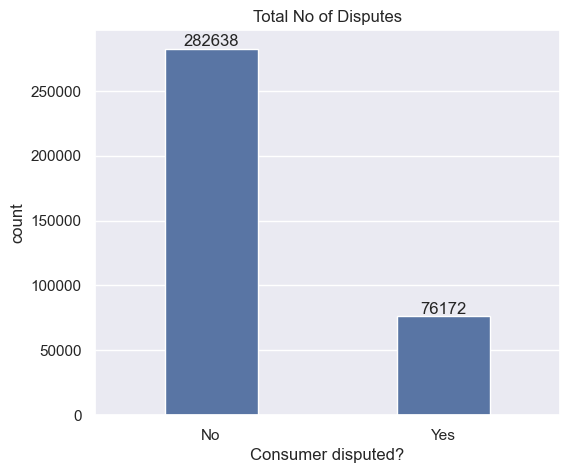

In [55]:
# make counts on target varible
sns.set_theme(rc={'figure.figsize':(6, 5)})
ax = sns.countplot(data=consumer_complaints_train_df, x='Consumer disputed?', width=0.4)
ax.bar_label(ax.containers[0])
ax.set_title('Total No of Disputes')
plt.show()

**From the figure shown above, we can tell among all 358810 records in the dataset, there are 76172 disputes**

Plot bar graph for the total no of disputes products-wise with help of seaborn

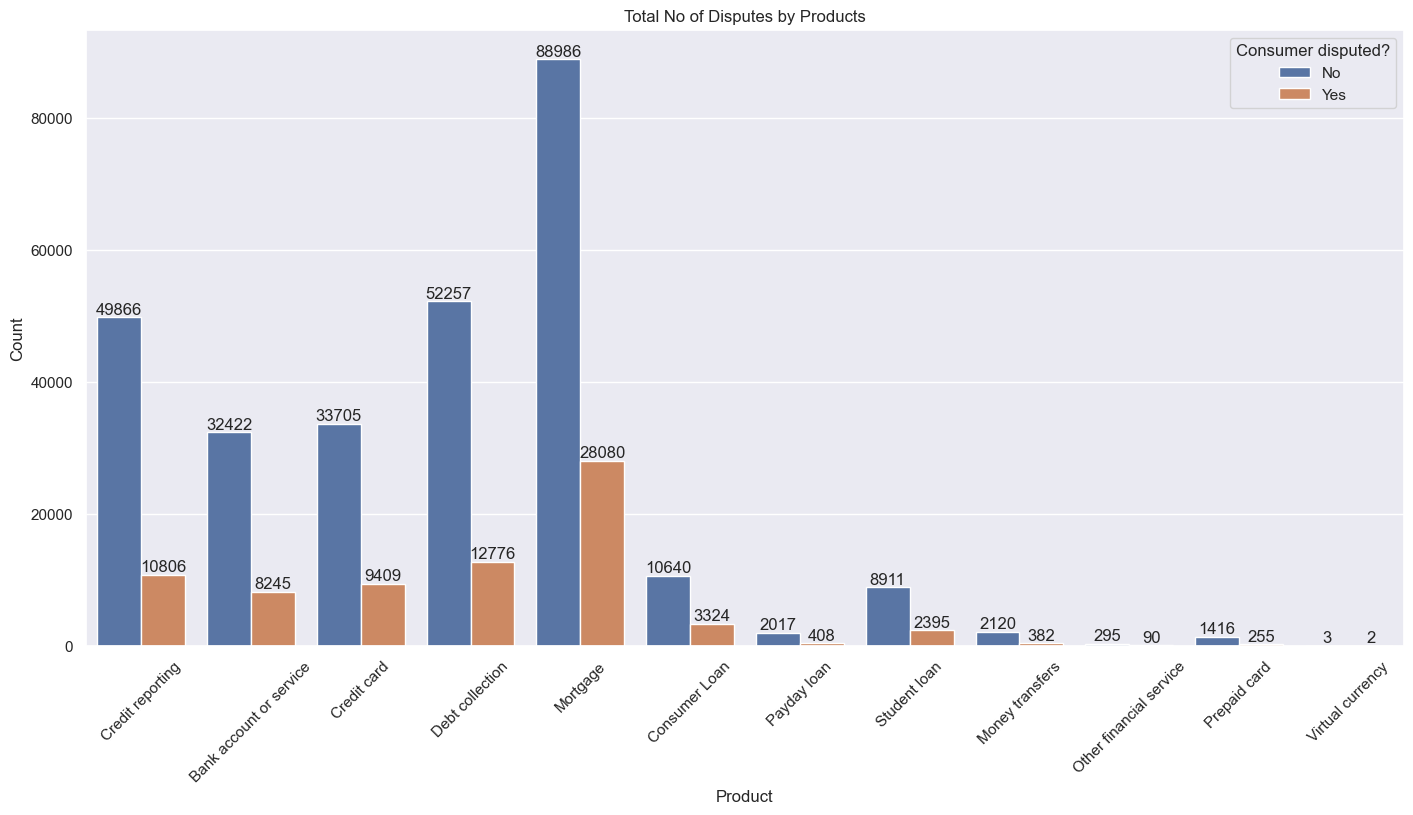

In [58]:
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.countplot(consumer_complaints_train_df, x='Product', hue='Consumer disputed?')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.tick_params(axis='x', rotation=45)
ax.set_title('Total No of Disputes by Products')
ax.set_ylabel('Count')
plt.show()

Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

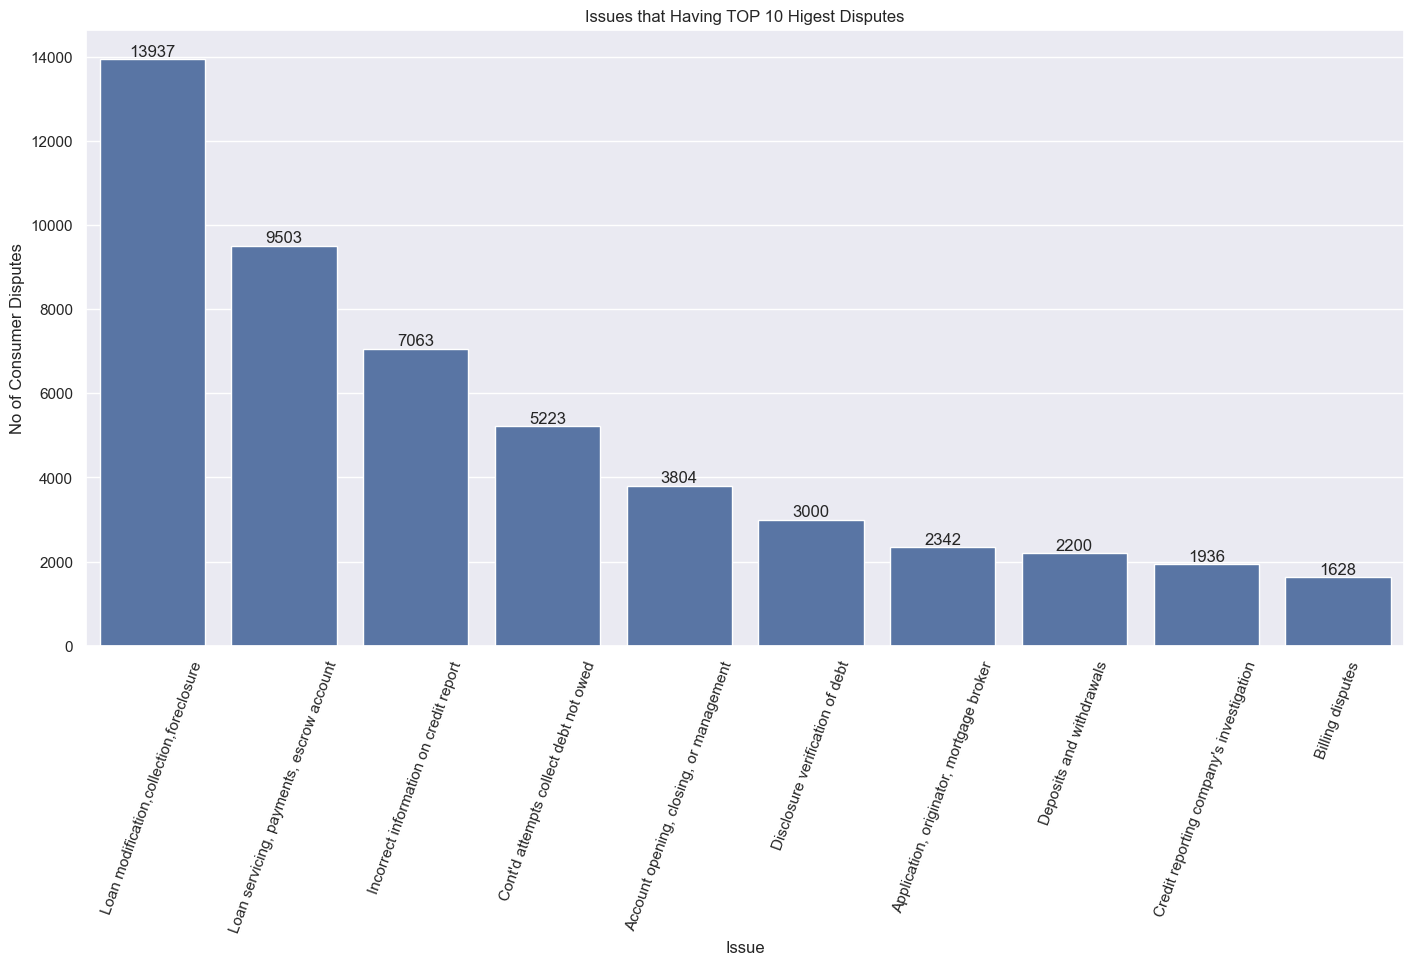

In [60]:
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.countplot(disputed_cons,
                   x='Issue',
                   order=disputed_cons['Issue'].value_counts()[0:10].index,
                   width=0.8
                  )
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=70)
ax.set_title('Issues that Having TOP 10 Higest Disputes')
ax.set_ylabel('No of Consumer Disputes')
plt.show()

Plot bar graph for the total no of disputes by State with Maximum Disputes

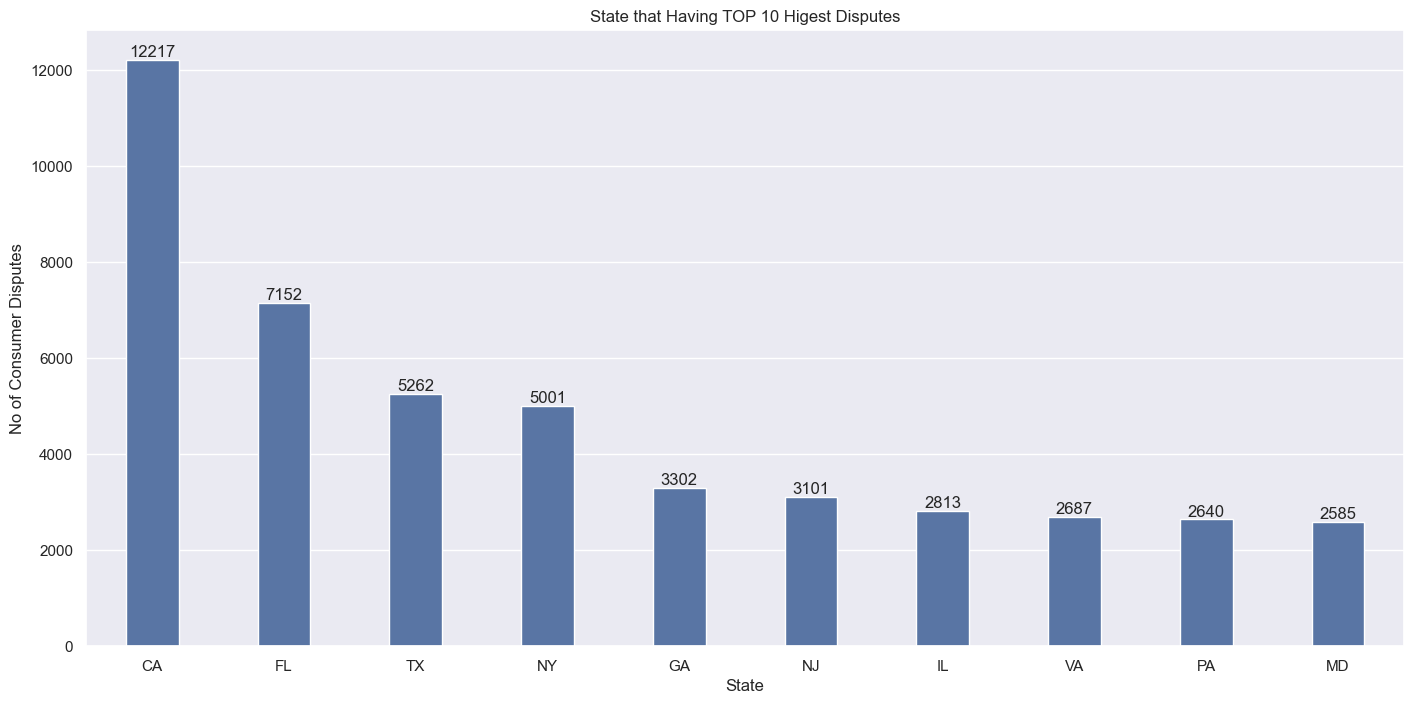

In [62]:
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.countplot(disputed_cons,
                   x='State',
                   order=disputed_cons['State'].value_counts()[0:10].sort_values(ascending=False).index,
                   width=0.4)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=0)
ax.set_title('State that Having TOP 10 Higest Disputes')
ax.set_ylabel('No of Consumer Disputes')
plt.show()

**From the figure above, we can tell California has the maximum disputes**

Plot bar graph for the total no of disputes by Submitted Via diffrent source

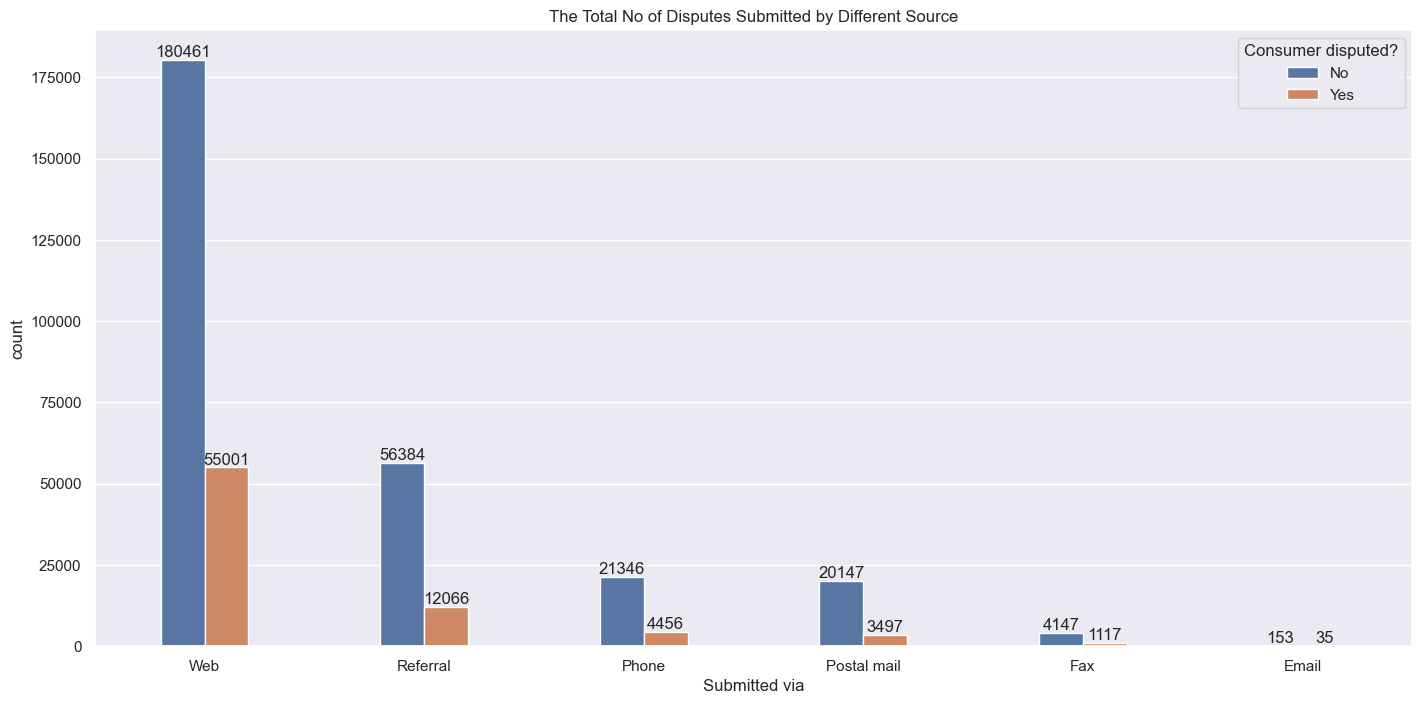

In [65]:
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.countplot(consumer_complaints_train_df,
                   x='Submitted via',
                   hue='Consumer disputed?',
                   order=disputed_cons['Submitted via'].value_counts().sort_values(ascending=False).index,
                   width=0.4)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.tick_params(axis='x', rotation=0)
ax.set_title('The Total No of Disputes Submitted by Different Source')
plt.show()

Plot bar graph for the total no of disputes where Company's Response to the Complaints

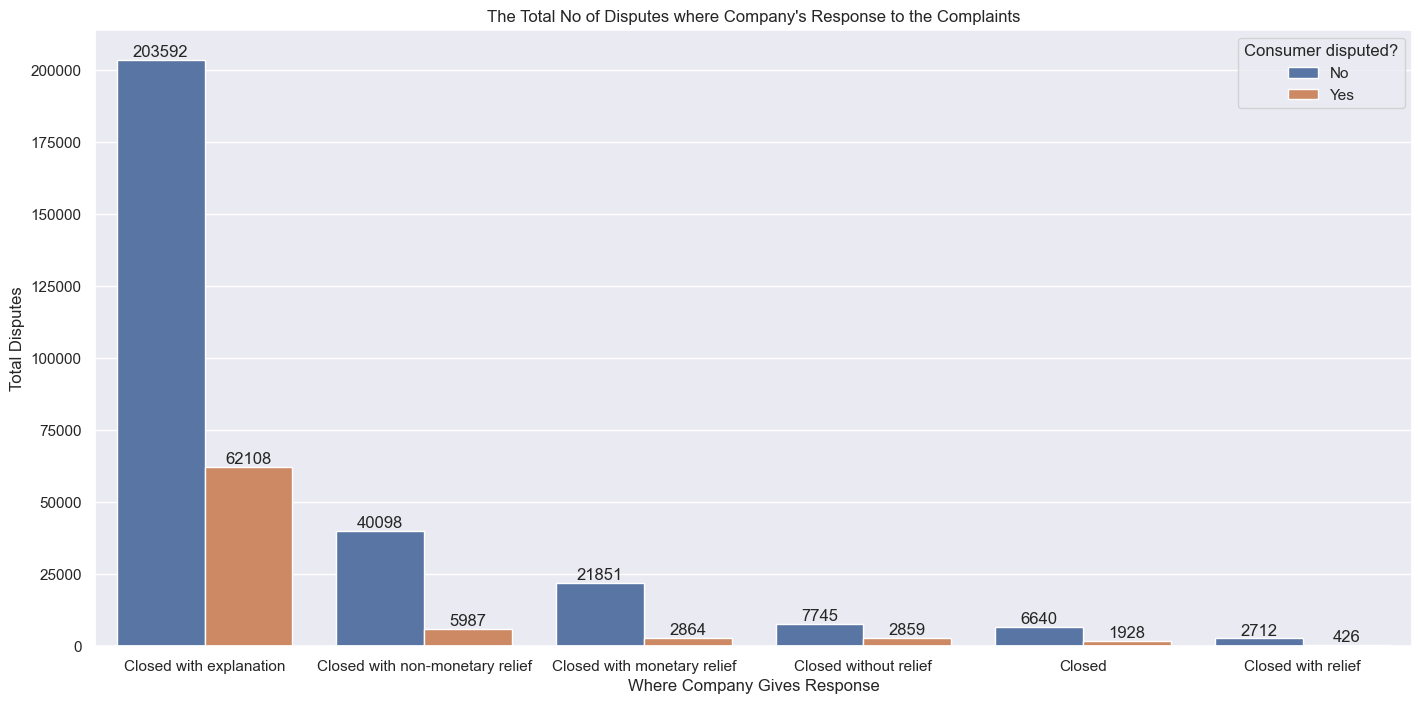

In [67]:
# Complaints: Having or Not having Disputes
# Disputes: Only Conusmer disputed
# draw barplots to display issues that having TOP 10 highst disputes
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.countplot(consumer_complaints_train_df,
                   x='Company response to consumer',
                   hue='Consumer disputed?',
                   order=consumer_complaints_train_df['Company response to consumer'].value_counts().sort_values(ascending=False).index)
ax.tick_params(axis='x', rotation=0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title('The Total No of Disputes where Company\'s Response to the Complaints')
ax.set_xlabel('Where Company Gives Response')
ax.set_ylabel('Total Disputes')
plt.show()

Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

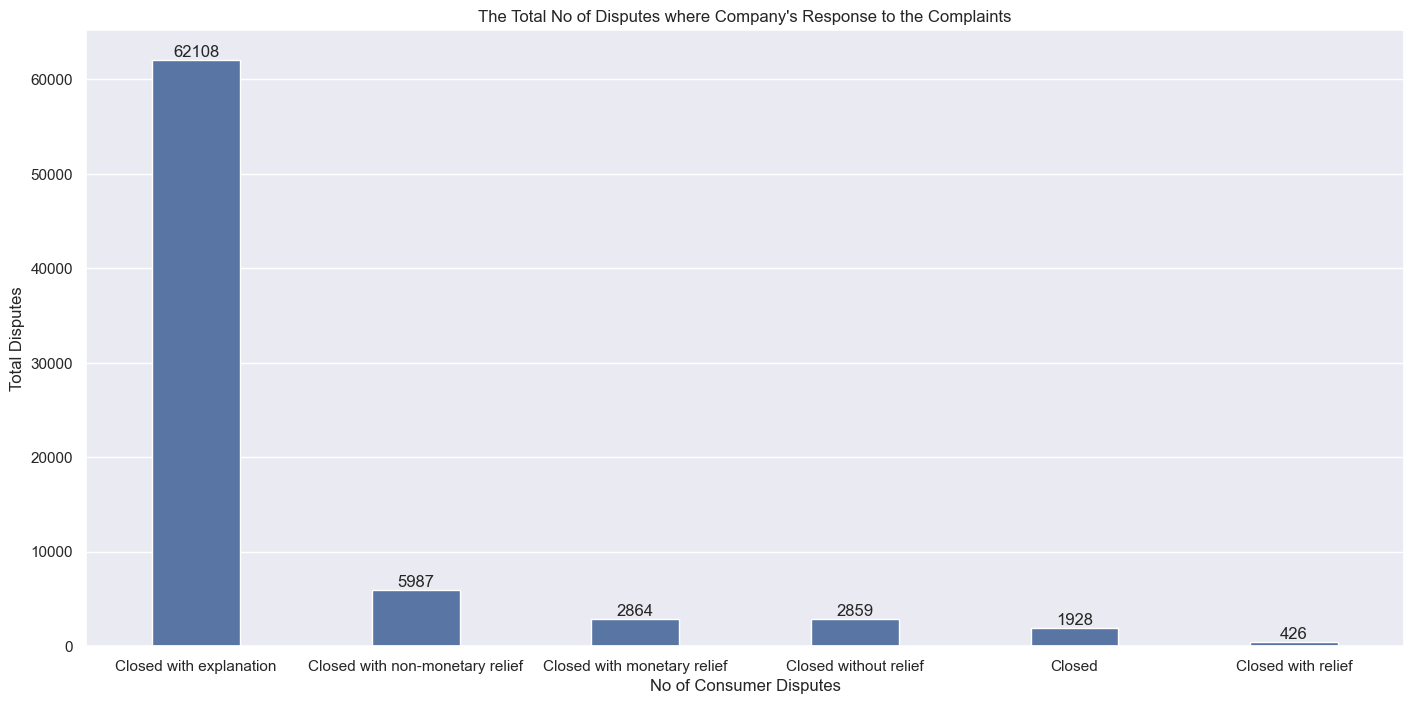

In [69]:
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.countplot(disputed_cons,
                   x='Company response to consumer',
                   order=disputed_cons['Company response to consumer'].value_counts().sort_values(ascending=False).index,
                   width=0.4)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=0)
ax.set_title('The Total No of Disputes where Company\'s Response to the Complaints')
ax.set_xlabel('No of Consumer Disputes')
ax.set_ylabel('Total Disputes')
plt.show()

**From the figure above, we can tell 'Closed with explanation' is the main cause leading to Disputes**

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

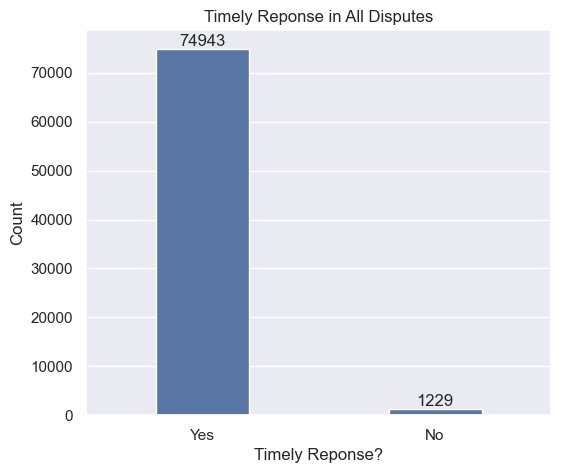

In [72]:
sns.set_theme(rc={'figure.figsize':(6, 5)})        # set the context with a specific size
ax = sns.countplot(disputed_cons,
                   x='Timely response?',
                   width=0.4)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=0)
ax.set_title('Timely Reponse in All Disputes')
ax.set_xlabel('Timely Reponse?')
ax.set_ylabel('Count')
plt.show()

In [73]:
non_timely_response_in_disputes = 1229 / (1229 + 74943)
np.round(non_timely_response_in_disputes * 100, 3)

1.613

**From the figure above, we can tell among all disputes, there are few having Non-timely response ones indeed, accounting for
1.61% among all disputes**

Plot bar graph for the total no of disputes over Year Wise Complaints

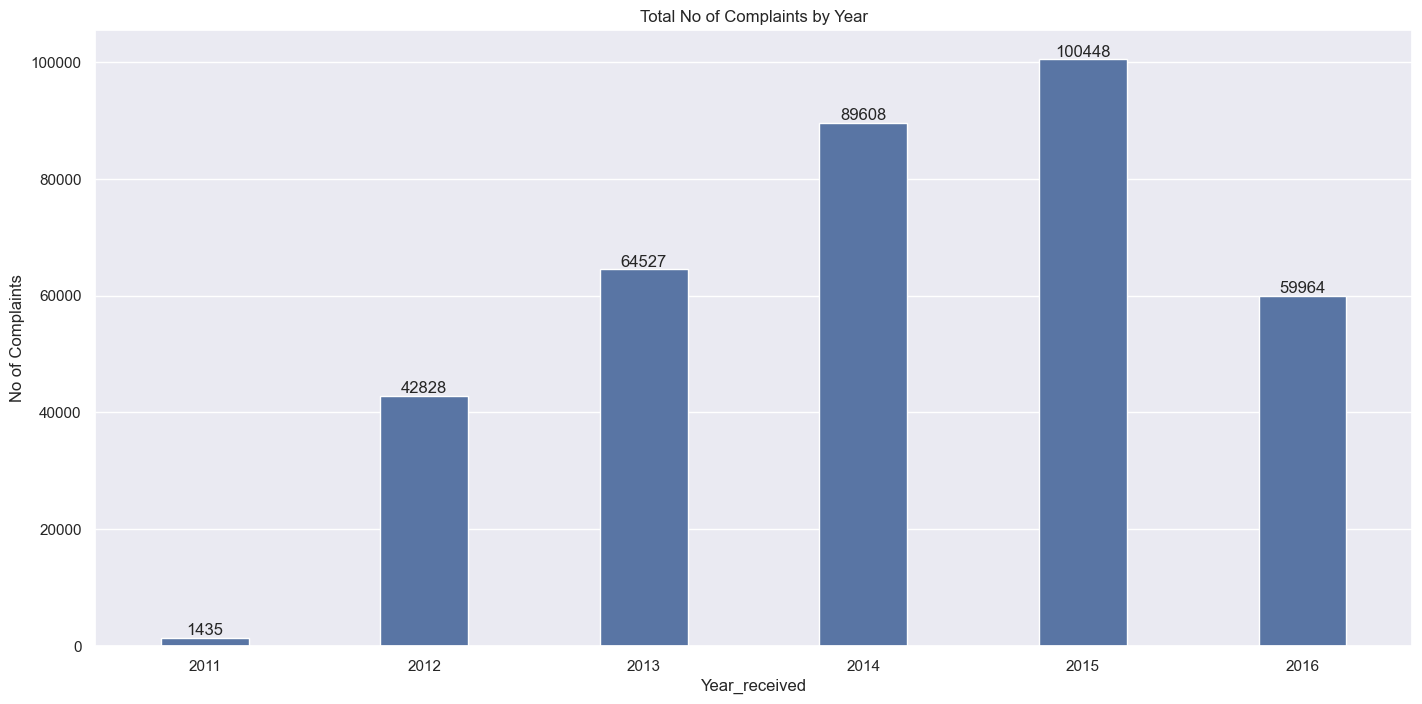

In [76]:
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.countplot(consumer_complaints_train_df,
                   x='Year_received',
                   width=0.4)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=0)
ax.set_title('Total No of Complaints by Year')
ax.set_xlabel('Year_received')
ax.set_ylabel('No of Complaints')
plt.show()

Plot bar graph for the total no of disputes over Year Wise Disputes

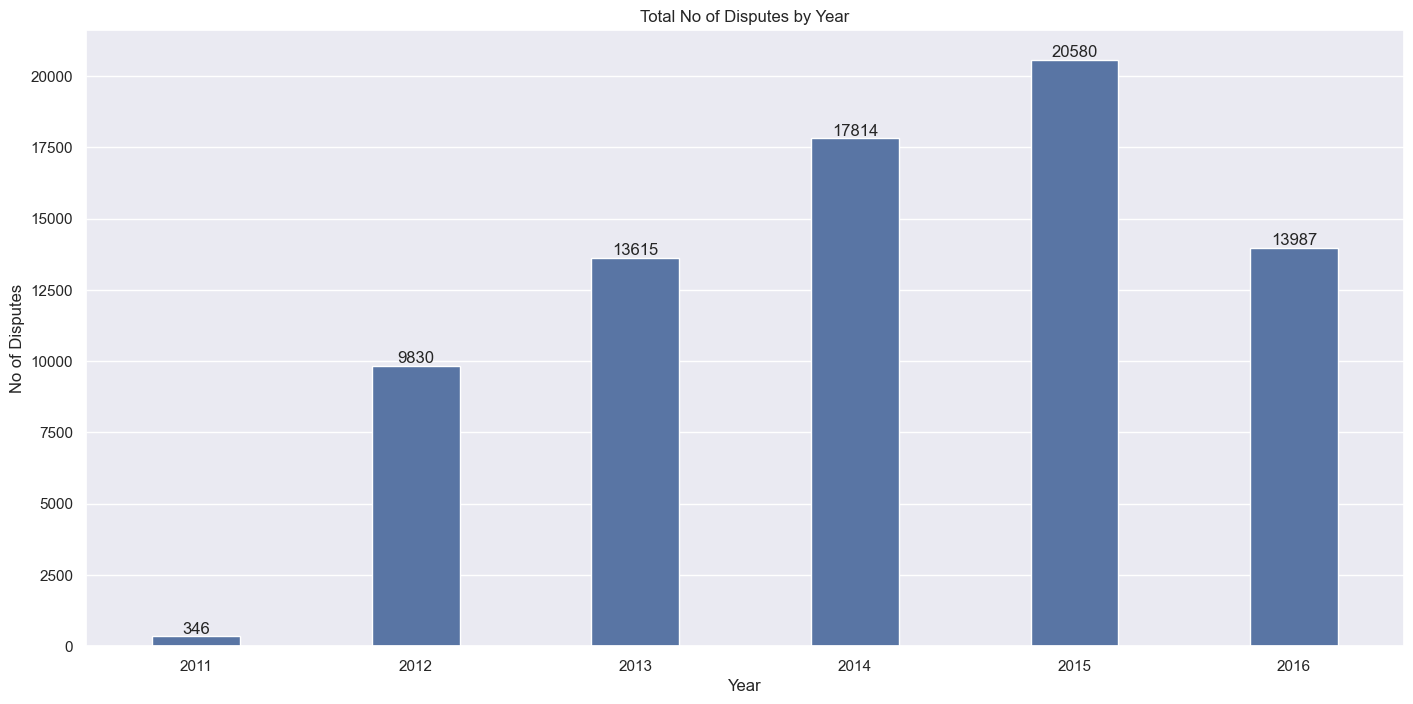

In [78]:
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.countplot(disputed_cons,
                   x='Year_received',
                   width=0.4)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=0)
ax.set_title('Total No of Disputes by Year')
ax.set_xlabel('Year')
ax.set_ylabel('No of Disputes')
plt.show()

Plot  bar graph for the top companies with highest complaints

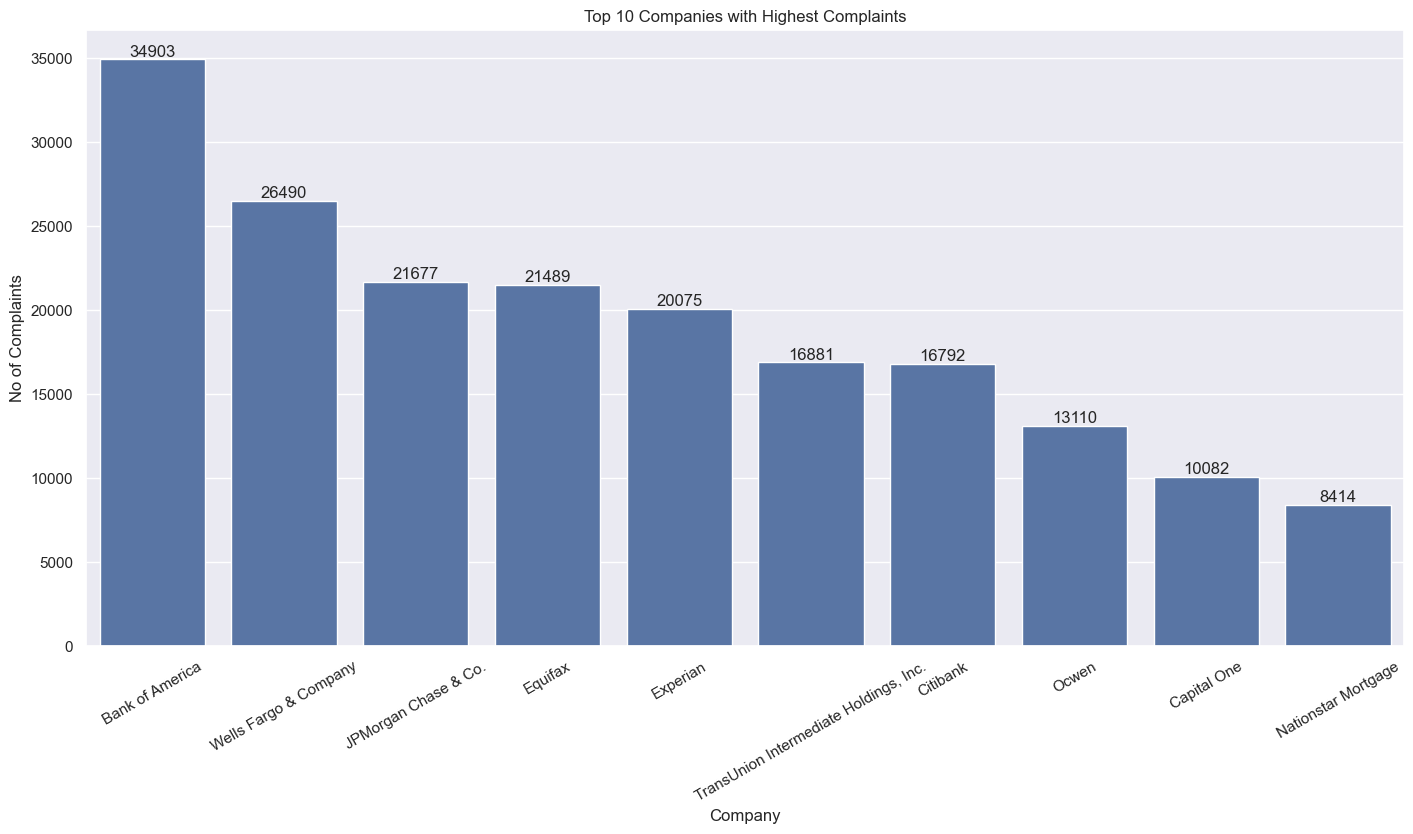

In [80]:
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.countplot(consumer_complaints_train_df,
                   x='Company',
                   order=consumer_complaints_train_df['Company'].value_counts()[0:10].sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=30)
ax.set_title('Top 10 Companies with Highest Complaints')
ax.set_xlabel('Company')
ax.set_ylabel('No of Complaints')
plt.show()

"Days Held" Column Analysis(describe)

In [82]:
pd.DataFrame(consumer_complaints_train_df['Days held'].describe())

,Days held
count,358810.000000
mean,4.456339
std,16.741676
min,-1.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,993.000000


In [83]:
pd.DataFrame(consumer_complaints_test_df['Days held'].describe())

,Days held
count,119606.000000
mean,4.443607
std,16.233377
min,-1.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,832.000000


Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [85]:
# for training set
train_filter = consumer_complaints_train_df['Days held'] < 0
consumer_complaints_train_df.loc[train_filter, 'Days held'] = 0

# for testing set
test_filter = consumer_complaints_test_df['Days held'] < 0
consumer_complaints_test_df.loc[test_filter, 'Days held'] = 0

In [86]:
consumer_complaints_train_df['Days held'].describe()

count    358810.000000
mean          4.467863
std          16.738260
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64

In [87]:
df_train, df_test = consumer_complaints_train_df, consumer_complaints_test_df

Text pre-processing

In [89]:
# Tokenize text data
tokenized_data_train = df_train['Issue'].apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = df_test['Issue'].apply(lambda x: wordpunct_tokenize(x.lower()))

# Remove punctuation
def remove_punctuation(text):
    return [w for w in text if w.isalpha()]
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))

# Remove stop words
stop_words = stopwords.words('english')
filtered_sentence_train = no_punctuation_data_train.apply(lambda x: [w for w in x if not w in stop_words])
filtered_sentence_test = no_punctuation_data_test.apply(lambda x: [w for w in x if not w in stop_words])

# Lemmatize text
lemmatized_data_train = filtered_sentence_train.apply(lambda x: [WordNetLemmatizer().lemmatize(w, pos='v') for w in x])
lemmatized_data_test = filtered_sentence_test.apply(lambda x: [WordNetLemmatizer().lemmatize(w, pos='v') for w in x])

# Stem text
stemmed_data_train = lemmatized_data_train.apply(lambda x: [PorterStemmer().stem(w) for w in x])
stemmed_data_test = lemmatized_data_test.apply(lambda x: [PorterStemmer().stem(w) for w in x])

# Convert words to sentences
clean_data_train = stemmed_data_train.apply(lambda x: ' '.join(x))
clean_data_test = stemmed_data_test.apply(lambda x: ' '.join(x))

In [90]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)

Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

In [92]:
df_train.drop(columns=['Company', 'State', 'Year_received', 'Days held'], axis=1, inplace=True)
df_test.drop(columns=['Company', 'State', 'Year_received', 'Days held'], axis=1, inplace=True)

Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [94]:
con_dis_to_rep = dict(zip(['Yes', 'No'], [1, 0]))
df_train.replace({'Consumer disputed?': con_dis_to_rep}, inplace=True)

In [95]:
df_train.head(2)

,Product,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_received,Week_Received,Issues_cleaned
0,Credit reporting,Web,Closed with explanation,Yes,0,10,2,incorrect inform credit report
1,Bank account or service,Web,Closed with explanation,Yes,1,4,4,deposit withdraw


Create Dummy Variables for catagorical features
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [97]:
dummy_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']

df_train_dummies = pd.get_dummies(df_train[dummy_cols], prefix_sep='_', drop_first=True)
df_test_dummies = pd.get_dummies(df_test[dummy_cols], prefix_sep='_', drop_first=True)
df_train_dummies.head(2)

,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


Concate Dummy Variables and Drop the Original Columns

In [99]:
# drop original columns
df_train.drop(dummy_cols, axis=1, inplace=True)
df_test.drop(dummy_cols, axis=1, inplace=True)

# concate dummy variables with the original dataframe
df_train = pd.concat([df_train, df_train_dummies], axis=1)
df_test = pd.concat([df_test, df_test_dummies], axis=1)

df_train.head(2)

,Consumer disputed?,Month_received,Week_Received,Issues_cleaned,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,0,10,2,incorrect inform credit report,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
1,1,4,4,deposit withdraw,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count   Dtype 
---  ------                                                        --------------   ----- 
 0   Consumer disputed?                                            358810 non-null  int64 
 1   Month_received                                                358810 non-null  int32 
 2   Week_Received                                                 358810 non-null  int64 
 3   Issues_cleaned                                                358810 non-null  object
 4   Product_Consumer Loan                                         358810 non-null  bool  
 5   Product_Credit card                                           358810 non-null  bool  
 6   Product_Credit reporting                                      358810 non-null  bool  
 7   Product_Debt collection                                       358

Calculating TF-IDF

In [102]:
tf = TfidfVectorizer()

issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()

tf_columns_train = []
tf_columns_test = []

for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
    
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)

weights = pd.DataFrame(tf.idf_, columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
54,11.998819
37,11.593354
47,11.593354
115,11.305672
93,11.305672


In [103]:
tf_columns_train[-1]

'Feature147'

In [104]:
tf_columns_test[-1]

'Feature146'

Replacing Issues_cleaned by Vectorized Issues

In [106]:
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

In [107]:
df_train.shape

(358810, 172)

In [108]:
df_test.shape

(119606, 171)

observe train and test datasets

In [110]:
df_train.head()

,Consumer disputed?,Month_received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147
0,0,10,2,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
1,1,4,4,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.707107,0.0,0.0
2,0,12,3,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
3,0,3,1,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.63037,0.000000,0.0,0.0
4,1,1,4,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.63037,0.000000,0.0,0.0


In [111]:
df_test.head()

,Month_received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature168
0,1,3,False,True,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,4,True,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,9,1,False,True,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5,3,True,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7,1,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Observe Shape of new Train and Test Datasets

In [113]:
# shape of new train datasets
df_train.shape

(358810, 172)

In [114]:
df_test.shape

(119606, 171)

Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [116]:
std = StandardScaler()

df_train_scaled = pd.DataFrame(std.fit_transform(df_train.drop('Consumer disputed?', axis=1)), columns=df_test.columns)
df_test_scaled = pd.DataFrame(std.fit_transform(df_test), columns=df_test.columns)

In [117]:
df_train_scaled.head(3)

,Month_received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature168
0,1.146639,-0.510366,-0.20123,-0.369551,2.216739,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,...,-0.037913,-0.088445,-0.009877,-0.045337,-0.120324,-0.00944,-0.188271,-0.178072,-0.028441,-0.026945
1,-0.641193,1.241870,-0.20123,-0.369551,-0.451113,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,...,-0.037913,-0.088445,-0.009877,-0.045337,-0.120324,-0.00944,-0.188271,5.615716,-0.028441,-0.026945
2,1.742583,0.365752,-0.20123,2.705985,-0.451113,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,...,-0.037913,-0.088445,-0.009877,-0.045337,-0.120324,-0.00944,-0.188271,-0.178072,-0.028441,-0.026945


Do feature selection with help of PCA

In [119]:
# Projection of PCA
principal_columns = []
list(map(lambda index: principal_columns.append('PC' + str(index + 1)), range(df_train_scaled.shape[1])))

pca = PCA()
principal_components = pca.fit_transform(df_train_scaled)
principalDf = pd.DataFrame(data=principal_components, columns=principal_columns)
principalDf.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171
0,4.60275,-2.092900,1.951673,-0.168579,0.571123,0.182416,0.018433,-0.084046,0.041965,-0.338687,...,4.024506e-16,-4.216293e-15,1.403592e-15,1.525874e-16,-3.600688e-16,-2.313277e-15,-3.051875e-15,-2.055359e-15,-6.945432e-16,2.163811e-16
1,0.24865,0.237045,-0.885320,0.138590,-0.307654,-0.053336,0.021381,0.125752,-0.056679,0.075696,...,1.375847e-15,-1.169685e-15,4.602274e-16,-3.721664e-16,1.586135e-16,3.153713e-16,7.159448e-16,-1.327995e-15,-9.180814e-17,-5.358383e-16


In [120]:
# Calculate explained ratio, and then display the variance and importance then
explained_ratio_train_df = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Ratio']).sort_values(by='Explained Ratio', ascending=False)
importance = []
list(map(lambda index: importance.append(explained_ratio_train_df['Explained Ratio'].head(index+1).sum()), range(explained_ratio_train_df.shape[0])))
explained_ratio_train_summary = pd.DataFrame({'Variable': principal_columns, 'Importance': importance})
explained_ratio_train_summary.head()

,Variable,Importance
0,PC1,0.036191
1,PC2,0.067466
2,PC3,0.093856
3,PC4,0.118251
4,PC5,0.141545


Select top features which are covering 80% of the information
(n=53),
<br>store this data into new dataframe,

In [122]:
# Select top features which are covering 80% of the information (n=53)
pca_train_model = PCA(n_components=53)
pca_test_model = PCA(n_components=53)

trained_pca = pca_train_model.fit_transform(df_train_scaled)
tested_pca = pca_test_model.fit_transform(df_test_scaled)

# store the data into new dataframe
trained_pca_df = pd.DataFrame(data=trained_pca, columns=[f'PC{i+1}' for i in range(trained_pca.shape[1])])
trained_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,4.602750,-2.092900,1.951673,-0.168579,0.571123,0.182416,0.018433,-0.084046,0.041965,-0.338687,...,0.408363,-0.099512,-0.326678,0.346259,0.853823,0.168037,-0.286902,0.094268,-0.288504,0.056425
1,0.248650,0.237045,-0.885320,0.138590,-0.307654,-0.053336,0.021381,0.125752,-0.056679,0.075696,...,0.157949,-0.425992,-0.144548,0.438013,2.582586,-0.150870,-0.926922,0.469847,-0.126733,-0.262222
2,0.526353,0.141628,-1.229773,0.007677,-0.721562,0.004372,-0.603506,-0.355997,-0.157025,-0.023605,...,-0.388010,0.707741,0.671028,-0.712510,-1.381739,-0.317675,0.487169,-0.503846,0.794096,0.353643
3,0.112647,3.456917,0.143296,-0.350651,0.668132,-0.181982,0.086911,-0.862512,0.160745,-0.203605,...,0.132082,-0.076490,-0.110815,-0.477372,-1.307038,0.203004,0.376577,-0.062518,0.040995,-0.188247
4,0.549719,3.768750,0.126193,-0.279618,1.078616,-0.345942,-0.016169,-0.714180,0.262087,-0.223679,...,0.034575,-0.016555,-0.092937,0.101835,0.794601,-0.008353,-0.371880,0.158417,-0.059359,-0.159856


In [123]:
tested_pca_df = pd.DataFrame(data=tested_pca, columns=[f'PC{i+1}' for i in range(tested_pca.shape[1])])
tested_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,0.227466,-0.049388,-2.818742,-0.104618,-0.807366,-0.432326,-1.316801,-0.648405,0.025023,-0.045901,...,-0.230434,-0.519191,1.681015,-2.202315,1.285642,-0.250611,-0.918824,-2.055067,-1.603995,0.359508
1,0.173738,-0.543123,-1.621408,-0.640117,0.348702,1.118599,-0.109123,1.945022,-3.509761,-4.780909,...,3.208514,-1.257612,-6.537370,-0.041395,-1.692206,-10.219226,0.488152,-2.778105,2.200489,1.987885
2,1.306885,-0.137332,-2.129852,0.186737,-1.501970,-0.241285,-1.849021,-0.145419,0.352375,-0.296742,...,0.491081,-0.384498,0.352658,0.430729,1.203970,-0.241836,-0.247079,0.268597,-0.920761,0.238287
3,1.464767,-0.018478,-2.444845,0.105670,-2.817931,-1.495679,5.079195,-0.321544,-0.220678,-0.315605,...,3.951776,5.346990,3.900137,-0.633698,-0.511552,-1.562599,-1.135906,0.440956,-0.277038,0.128686
4,1.247983,3.171112,-1.313813,-0.262583,2.786089,-1.747564,-0.537991,7.501482,-7.239754,9.886926,...,0.224001,-0.115681,-0.174686,0.090274,-0.078914,0.286666,0.180311,-0.016579,-0.142942,-0.131764


Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [125]:
X, y = trained_pca_df, df_train['Consumer disputed?']

Split data into Train and Test datasets
(for test data use test excel file data)

In [127]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)
X_test = tested_pca

Shapes of the datasets

In [129]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((251167, 53), (107643, 53), (251167,), (107643,), (119606, 53))

**Model building**
Build given models and mesure their test and validation accuracy
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

In [131]:
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          KNeighborsClassifier(),
          XGBClassifier()]
model_names = [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'AdaBoostClassifier',
    'GradientBoostingClassifier',
    'KNeighborsClassifier',
    'XGBClassifier'
]
acc_score_train = []
acc_score_val = []

def accuracy_collection(model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_score_train.append(accuracy_score(y_train, y_pred_train))
    acc_score_val.append(accuracy_score(y_val, y_pred_val))

list(map(lambda model: accuracy_collection(model), models))

  File "E:\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[None, None, None, None, None, None, None]

In [132]:
train_val_acc_dict = {'Modelling Algorithm': model_names,
                      'Training Accuracy': acc_score_train,
                      'Validation Accuracy': acc_score_val}
train_val_acc_df = pd.DataFrame(train_val_acc_dict).sort_values(by='Validation Accuracy', ascending=False)
train_val_acc_df

,Modelling Algorithm,Training Accuracy,Validation Accuracy
0,LogisticRegression,0.787878,0.787315
3,AdaBoostClassifier,0.787878,0.787315
4,GradientBoostingClassifier,0.787894,0.787306
6,XGBClassifier,0.788913,0.787120
1,DecisionTreeClassifier,0.800539,0.776056
2,RandomForestClassifier,0.800519,0.775907
5,KNeighborsClassifier,0.760044,0.745353


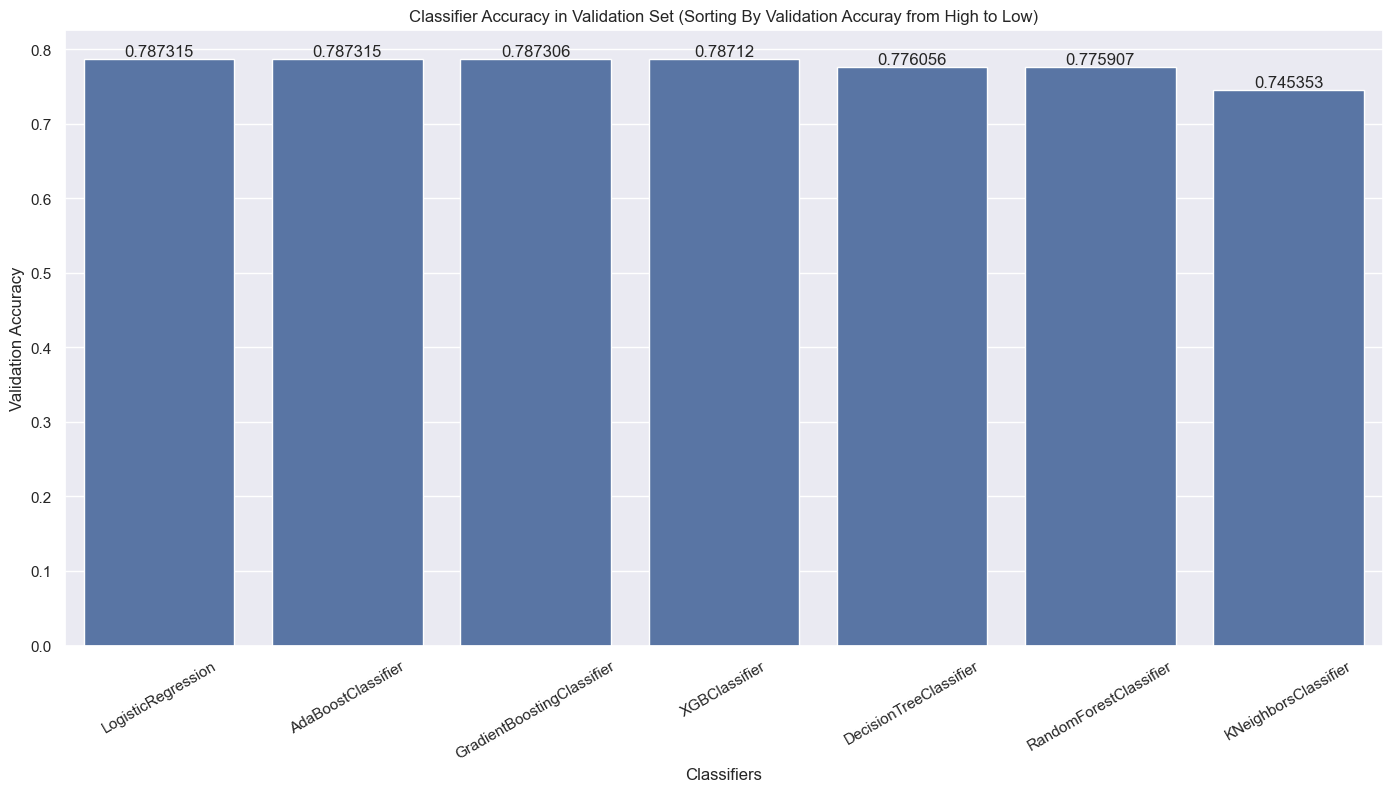

In [133]:
# Plot all the accuracies in the diagram
sns.set_theme(rc={'figure.figsize':(17, 8)})        # set the context with a specific size
ax = sns.barplot(x='Modelling Algorithm',
                 y='Validation Accuracy',
                 data=train_val_acc_df)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=30)
ax.set_title('Classifier Accuracy in Validation Set (Sorting By Validation Accuray from High to Low)')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Validation Accuracy')
plt.show()

Final Model and Prediction for test data file

In [135]:
# From the results shown above, LogisticRegression and AdaboostClassifier is the best classifier
best_classfier = LogisticRegression()
best_classfier.fit(X_train, y_train)

# make prediction on the testing dataset
consumer_complaints_test_df['Consumer disputed?'] = best_classfier.predict(X_test)

Export Predictions to CSV

In [137]:
# save the testing dataset with prediction results together to the file
consumer_complaints_test_df.to_csv('test_data_with_prediction.csv', index=False)

In [138]:
consumer_complaints_test_df['Consumer disputed?'].value_counts()

Consumer disputed?
0    119569
1        37
Name: count, dtype: int64